### Tweeter Data Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('wordnet')

/Users/robertmccormick/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertmccormick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/robertmccormick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
#Change output_file_path to the path on your machine
output_file_path ='/Users/user/Downloads/Spring 2023/MACHINE LEARNING/Project/ObamaCare tweets/ObamaCare tweets/example_tokenized.csv'
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

#adding new_punct 
new_punct = '...,—…,“•”’'
punctuations = punctuations + new_punct
# stemmer = SnowballStemmer('english')

#addding additional stop word 
new_stopwords = 'rt'
stop_words.add(new_stopwords)



#Change the path to the path on your machine
# df = pd.read_csv('C:/Users/user/Downloads/Spring 2023/MACHINE LEARNING/Project/ObamaCare tweets/ObamaCare tweets/obamacare_19_23.csv')
df = pd.read_csv('/Users/robertmccormick/Downloads/obamacare_19_23.csv')
print(df)
tokenizer=TweetTokenizer()
df['Tokenized_Text'] = df['Text'].apply(tokenizer.tokenize)



def preprocessing_twts(tokens):
    '''
    '''
    tokens = [token.lower() for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Remove punctuations
    tokens = [token for token in tokens if token not in punctuations]
    # Apply stemming
    # tokens = [stemmer.stem(token) for token in tokens]
    return tokens

df['Tokenized_Text'] = df['Tokenized_Text'].apply(preprocessing_twts)
# df.to_csv(output_file_path, index=False)
df.columns.values

                        Id        Date  \
0      1641893127261945857  2023-03-31   
1      1641879286805155848  2023-03-31   
2      1641871341581131777  2023-03-31   
3      1641860778788569094  2023-03-31   
4      1641860772669128705  2023-03-31   
...                    ...         ...   
36719  1080303994751221762  2019-01-02   
36720  1080276264404033536  2019-01-02   
36721  1080160174332174336  2019-01-01   
36722  1080105315331383296  2019-01-01   
36723  1079972489453809664  2019-01-01   

                                                    Text  
0      This affects nearly 168 million people on empl...  
1      OK so, insurance companies are being given the...  
2      Texas judge rules against free preventive care...  
3      Texas judge strikes down free HIV drugs, cance...  
4      Texas judge strikes down free HIV drugs, cance...  
...                                                  ...  
36719  In covering #healthcare &amp; #Obamacare (ACA)...  
36720  ICYMI: Judge: Ob

array(['Id', 'Date', 'Text', 'Tokenized_Text'], dtype=object)

### Tweet Counts Statistics Over Time


<b>Interesting Findings: Tweet counts is relatively higher during September 2020to February 2021</b>

/var/folders/00/rbn7fl1d2n9523tkxw2z79z80000gn/T/ipykernel_82717/1239811155.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
/var/folders/00/rbn7fl1d2n9523tkxw2z79z80000gn/T/ipykernel_82717/1239811155.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


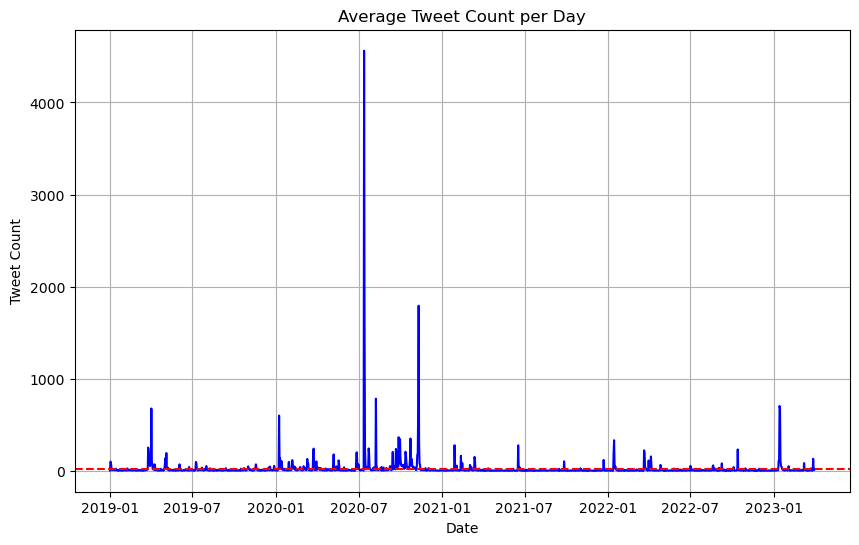

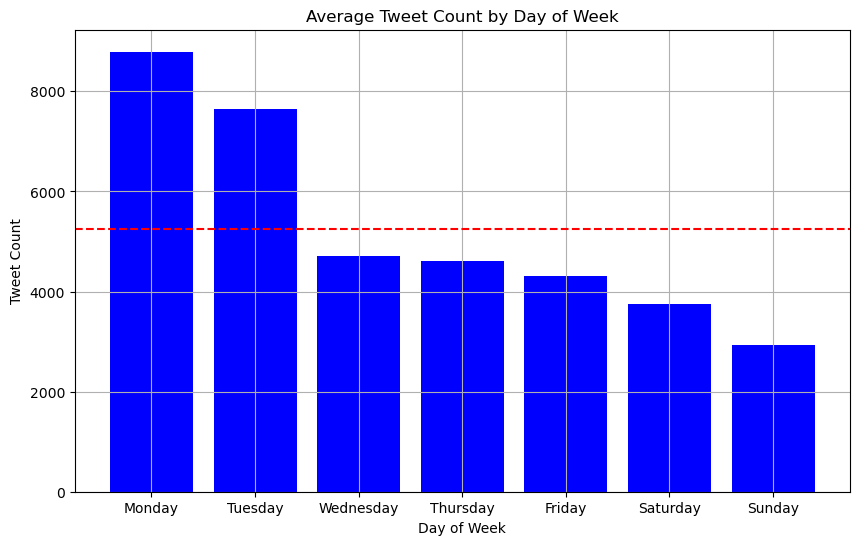

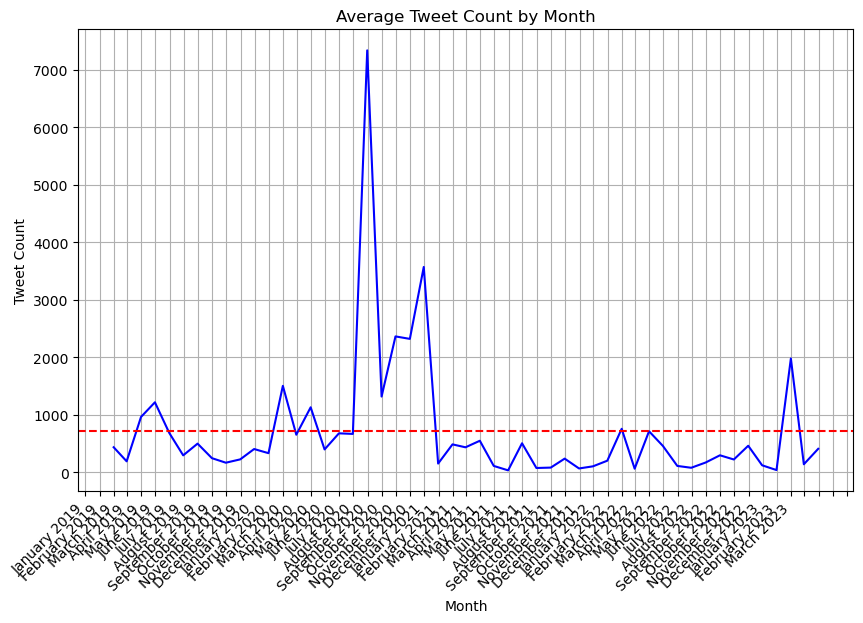

In [4]:
# Convert the tweet date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Calculate the average tweet count per day
daily_tweets = df.resample('D').size()
avg_daily_tweets = daily_tweets.mean()

# Plot the average tweet count per day
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_tweets.index, daily_tweets, color='blue')
ax.axhline(y=avg_daily_tweets, color='red', linestyle='--')
ax.set(xlabel='Date', ylabel='Tweet Count', title='Average Tweet Count per Day')
ax.grid()

# Calculate the average tweet count by day of the week
day_of_week_tweets = df.groupby(df.index.dayofweek).size()
avg_day_of_week_tweets = day_of_week_tweets.mean()

# Plot the average tweet count by day of the week
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(day_of_week_tweets.index, day_of_week_tweets, color='blue')
ax.axhline(y=avg_day_of_week_tweets, color='red', linestyle='--')
ax.set(xlabel='Day of Week', ylabel='Tweet Count', title='Average Tweet Count by Day of Week')
ax.set_xticklabels(['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.grid()

# Calculate the average tweet count by month
monthly_tweets = df.resample('M').size()
avg_monthly_tweets = monthly_tweets.mean()

# Plot the average tweet count by month
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_tweets.index, monthly_tweets, color='blue')
ax.axhline(y=avg_monthly_tweets, color='red', linestyle='--')
ax.set(xlabel='Month', ylabel='Tweet Count', title='Average Tweet Count by Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.grid()

# Format the x-axis tick labels
labels = [pd.to_datetime(str(x)).strftime('%B %Y') for x in monthly_tweets.index]
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()

### Top Words, @, and Hashtags in Dataset 

This code is to count the frquency of the words, mentions, and hashtags across the whole twitter dataset. This helps us visualize and informs us about the overall data and potentially informs us on feature creation. In addition, this allows us to remove unimportant words and punctuation in the tokenized tweets. 

In [5]:

dfc = df.copy()
dfc = dfc.loc[:,'Tokenized_Text']

dfc

Date
2023-03-31    [affects, nearly, 168, million, people, employ...
2023-03-31    [ok, insurance, companies, given, ability, cov...
2023-03-31    [texas, judge, rules, free, preventive, care, ...
2023-03-31    [texas, judge, strikes, free, hiv, drugs, canc...
2023-03-31    [texas, judge, strikes, free, hiv, drugs, canc...
                                    ...                        
2019-01-02    [covering, #healthcare, #obamacare, aca, 2019,...
2019-01-02    [icymi, judge, obama, healthcare, law, remains...
2019-01-01    [@realdonaldtrump, go, denying, coverage, suff...
2019-01-01    [@usaneedstrump, @sensherrodbrown, agreed, oba...
2019-01-01    [insured, new, year, i'm, single, parent, worr...
Name: Tokenized_Text, Length: 36724, dtype: object

In [6]:
word_dict = {}
at_dict = {}
hash_dict = {}

for index, row in dfc.items():
    for word in row:
        if word[0] == '#':
            if word not in hash_dict:
                hash_dict[word] = 1
            else:
                hash_dict[word] += 1
        elif word[0] == '@':
            if word not in at_dict:
                at_dict[word] = 1
            else:
                at_dict[word] += 1
        else:
            if word not in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1

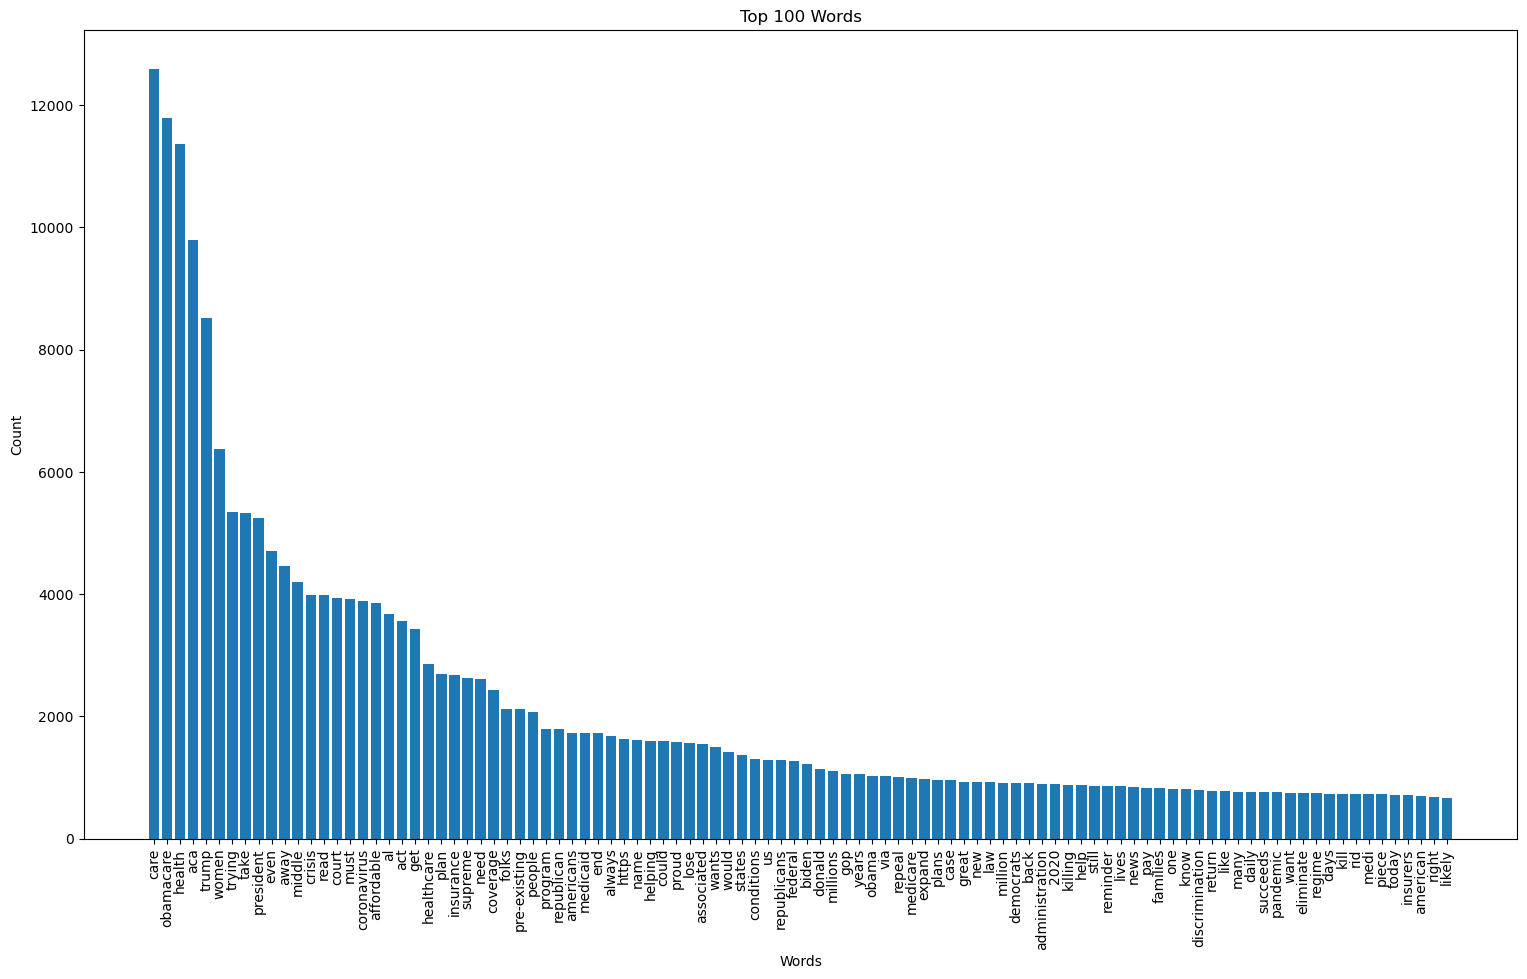

In [7]:
word_dict
sorted_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
top_100 = sorted_dict[:100]
top_100_words = [item[0] for item in top_100]
top_100_count = [item[1] for item in top_100]
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.bar(top_100_words, top_100_count)
plt.xticks(rotation = 90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 100 Words')
plt.show()

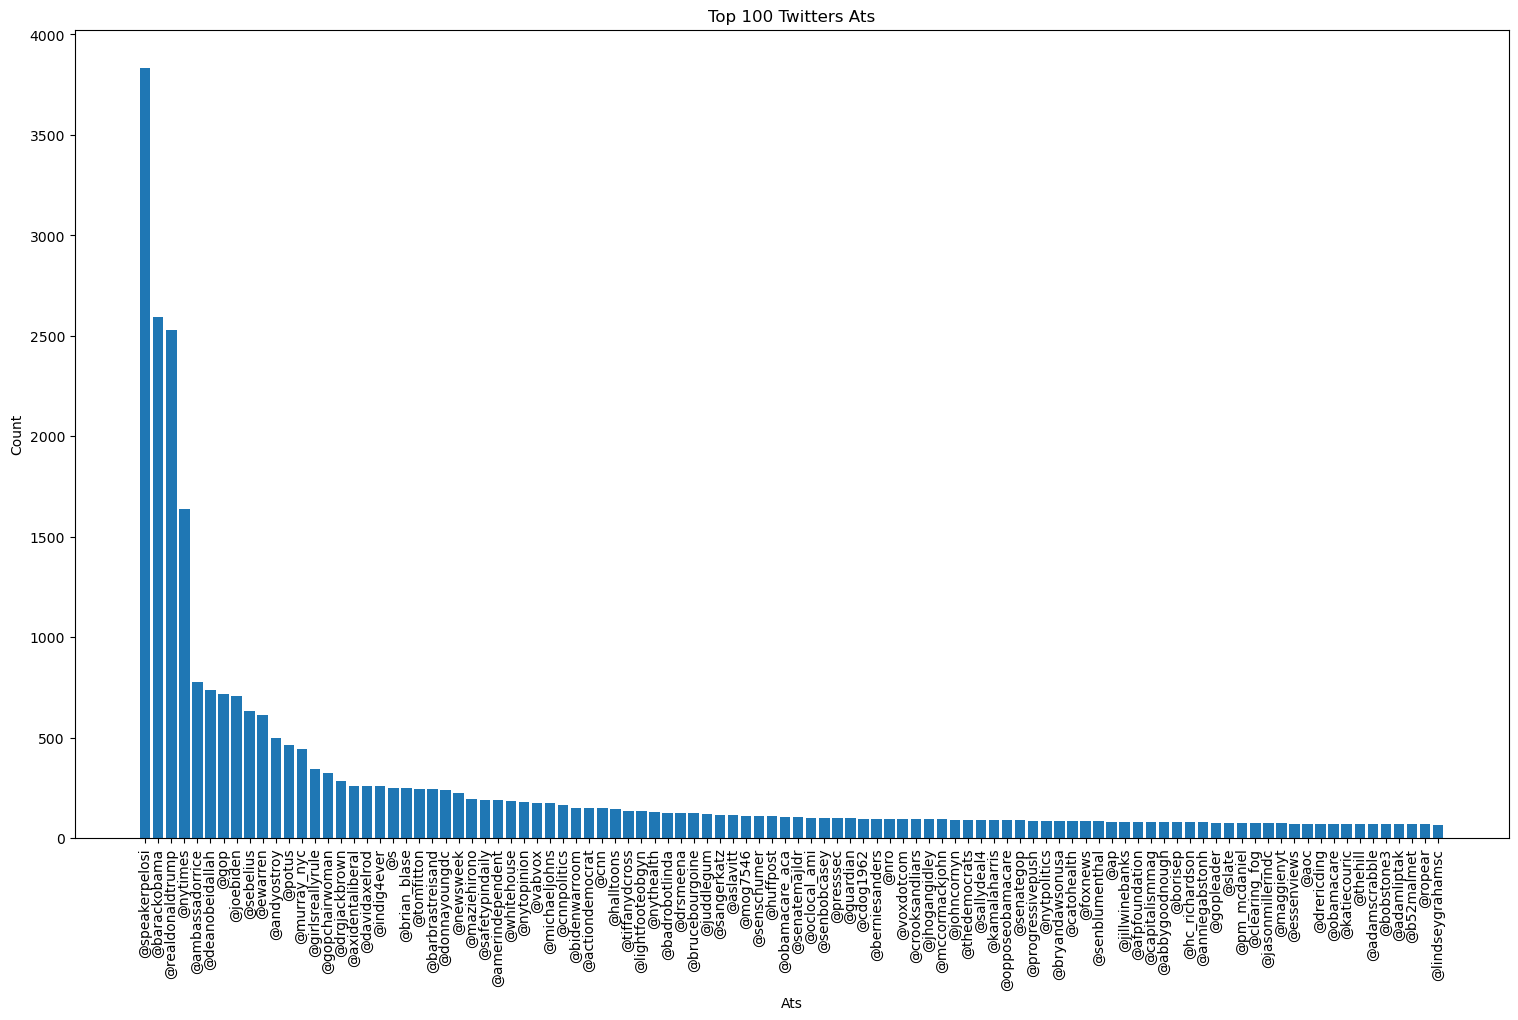

In [8]:
at_dict
sorted_dict = sorted(at_dict.items(), key=lambda x: x[1], reverse=True)
top_100 = sorted_dict[:100]
top_100_words = [item[0] for item in top_100]
top_100_count = [item[1] for item in top_100]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.bar(top_100_words, top_100_count)
plt.xticks(rotation = 90)
plt.xlabel('Ats')
plt.ylabel('Count')
plt.title('Top 100 Twitters Ats')
plt.show()

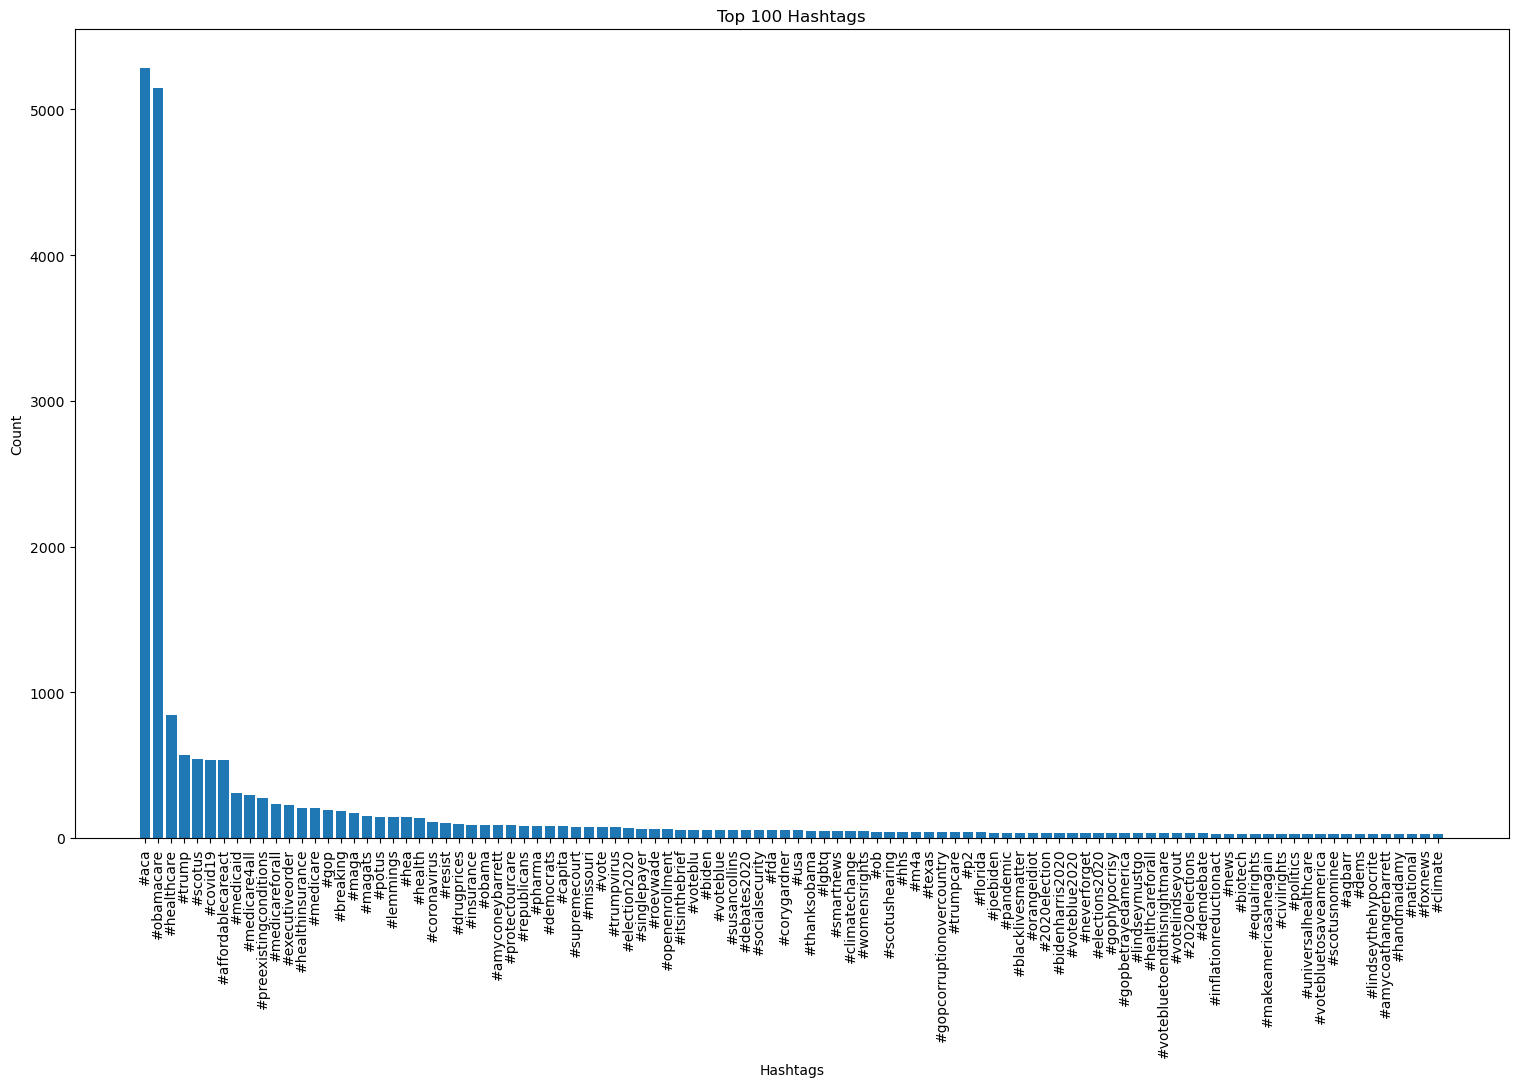

In [9]:
hash_dict
sorted_dict = sorted(hash_dict.items(), key=lambda x: x[1], reverse=True)
top_100 = sorted_dict[:100]
top_100_words = [item[0] for item in top_100]
top_100_count = [item[1] for item in top_100]


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.bar(top_100_words, top_100_count)
plt.xticks(rotation = 90)
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 100 Hashtags')
plt.show()

The following code provides the word, hashtags, and mentions frequencies in a wordcloud. This helps visualize the frequency of these items in the whole data set. 

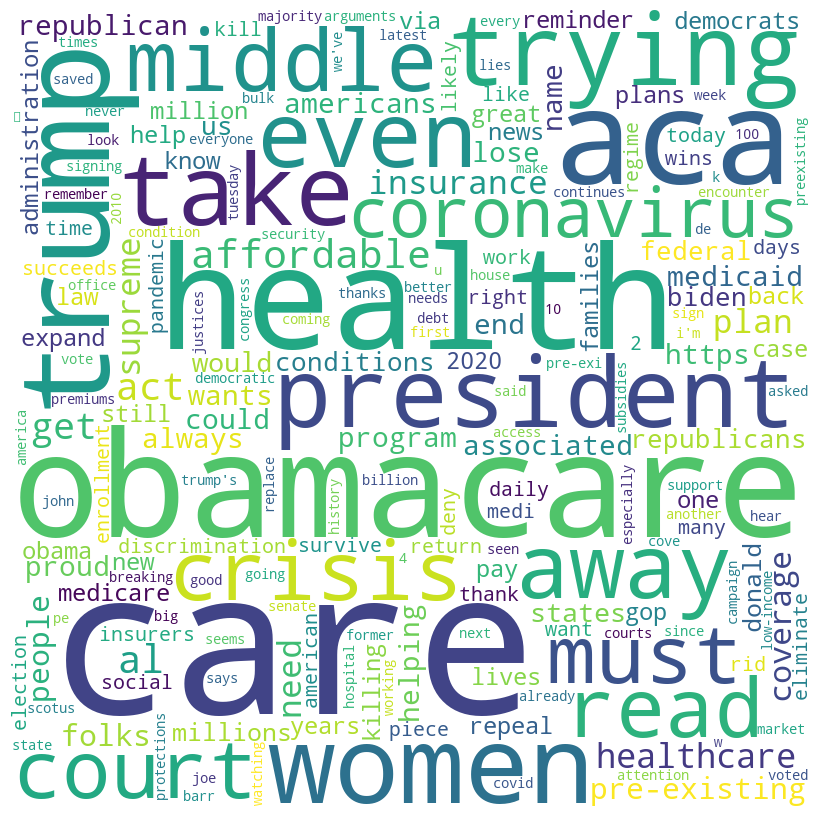

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies = word_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

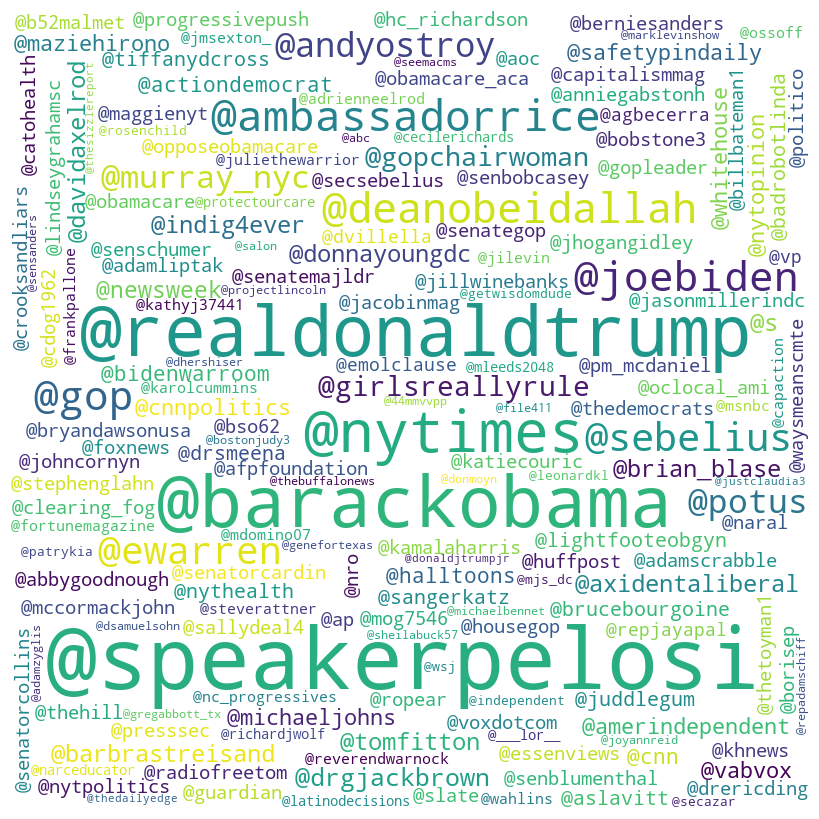

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies = at_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

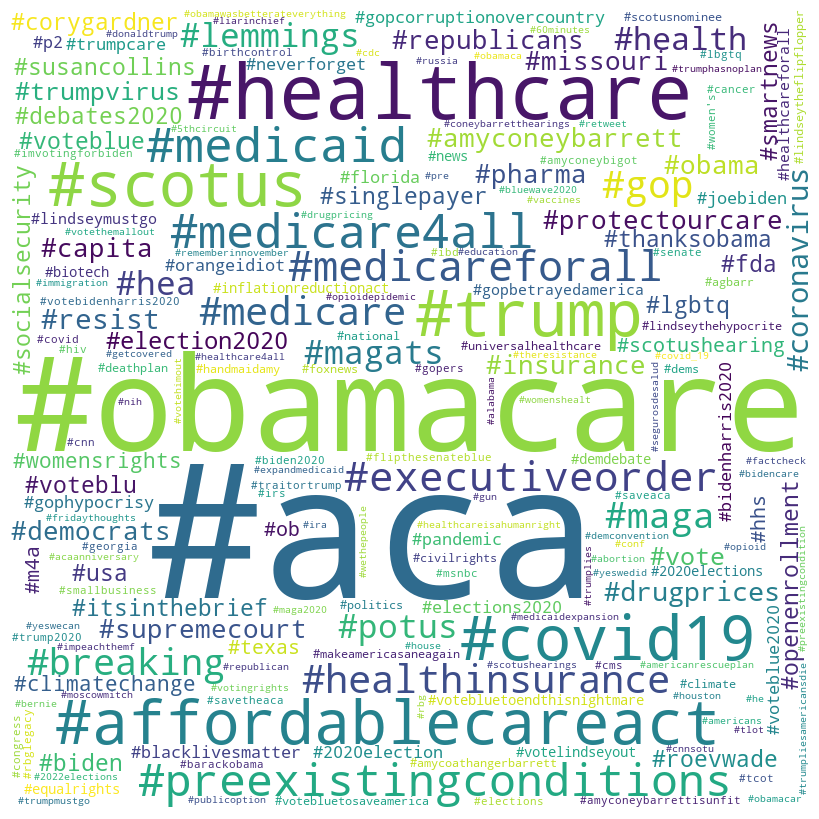

In [12]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies = hash_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Creating N-grams as a Hyperparameter 

We hope to provide more context to words and phrases by useing n-grams as a hyperparameter to train the data. Here we created a function and provide similar plots as above to visuals common n-grams.

In [16]:
def n_gram(n):
    total_lst =[]
    for index, row in dfc.items():
        n_gram_lst = []
        for i in range(0, len(row)-n+1):
            n_gram_lst.append(tuple(row[i: i + n]))
        total_lst.append(n_gram_lst)
    return total_lst
trigram = n_gram(3)
bigram = n_gram(2)

In [17]:
def ngram_count_dict(n_gram_lst):
    
    ngram_dict = {}
    for row in n_gram_lst:
        for word in row:
                if word not in ngram_dict:
                    ngram_dict[word] = 1
                else:
                    ngram_dict[word] += 1
    return ngram_dict

In [26]:
tri_count_dict = ngram_count_dict(trigram)
bi_count_dict = ngram_count_dict(bigram)

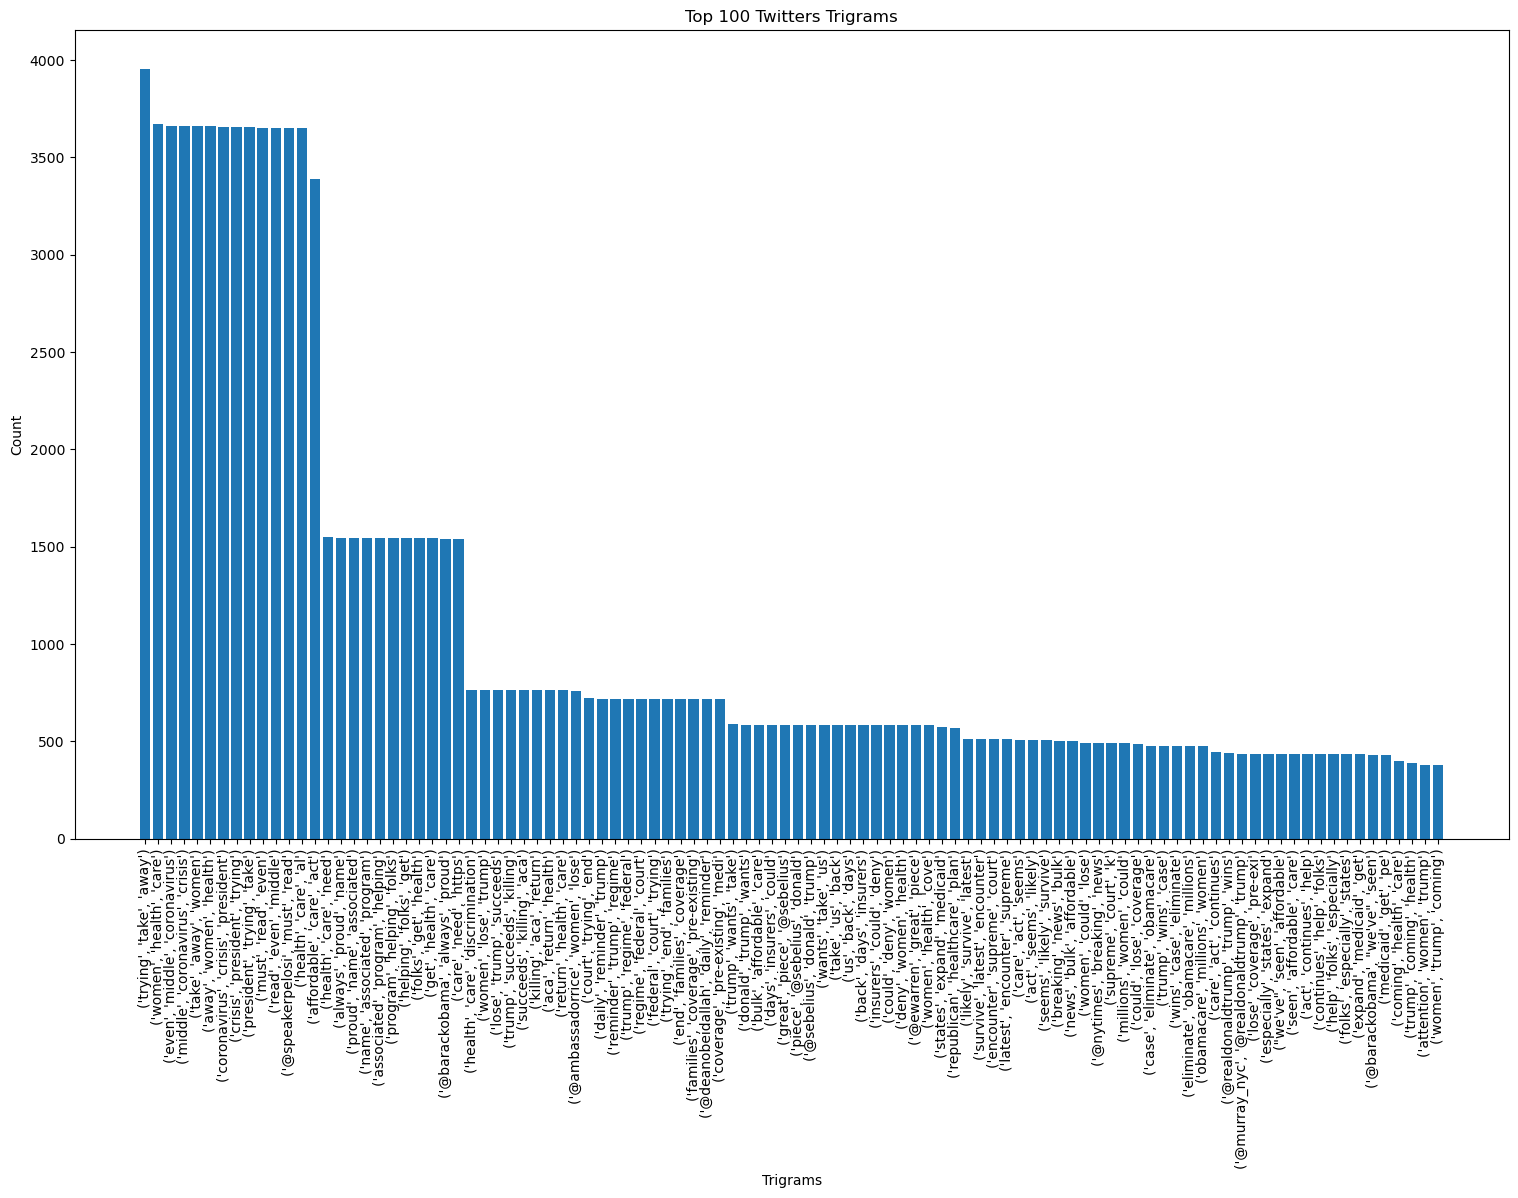

In [19]:
sorted_dict = sorted(tri_count_dict.items(), key=lambda x: x[1], reverse=True)
top_100 = sorted_dict[:100]
top_100_words = [str(item[0]) for item in top_100]
top_100_count = [item[1] for item in top_100]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.bar(top_100_words, top_100_count)
plt.xticks(rotation = 90)
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.title('Top 100 Twitters Trigrams')
plt.show()

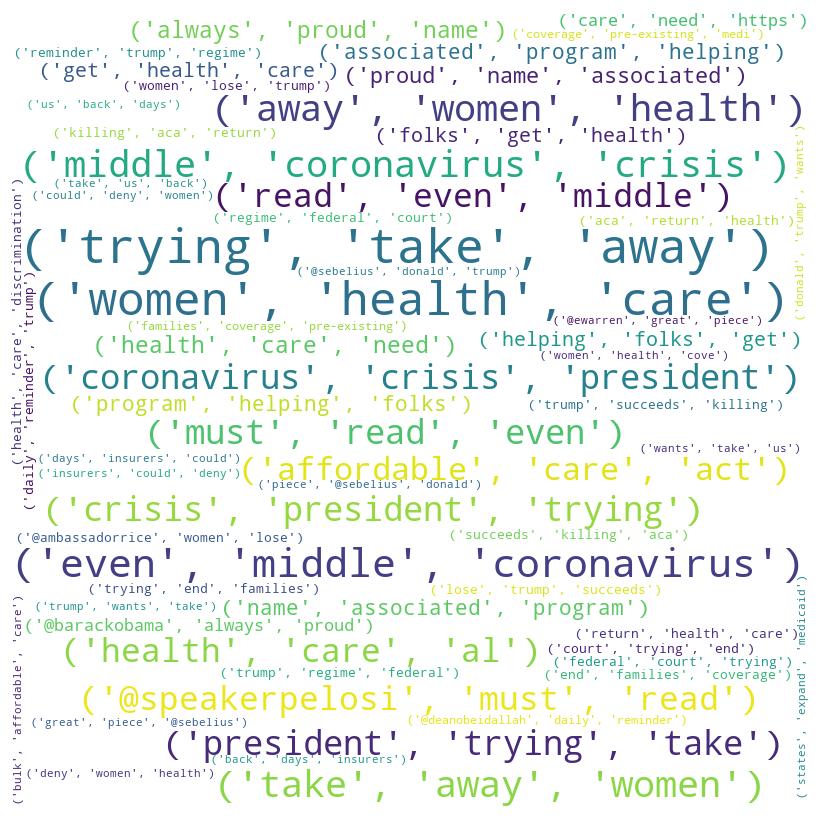

In [23]:
new_tri_dict = {}
for key, value in  tri_count_dict.items():
    new_key = str(key)
    new_tri_dict[new_key] = value

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies = new_tri_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

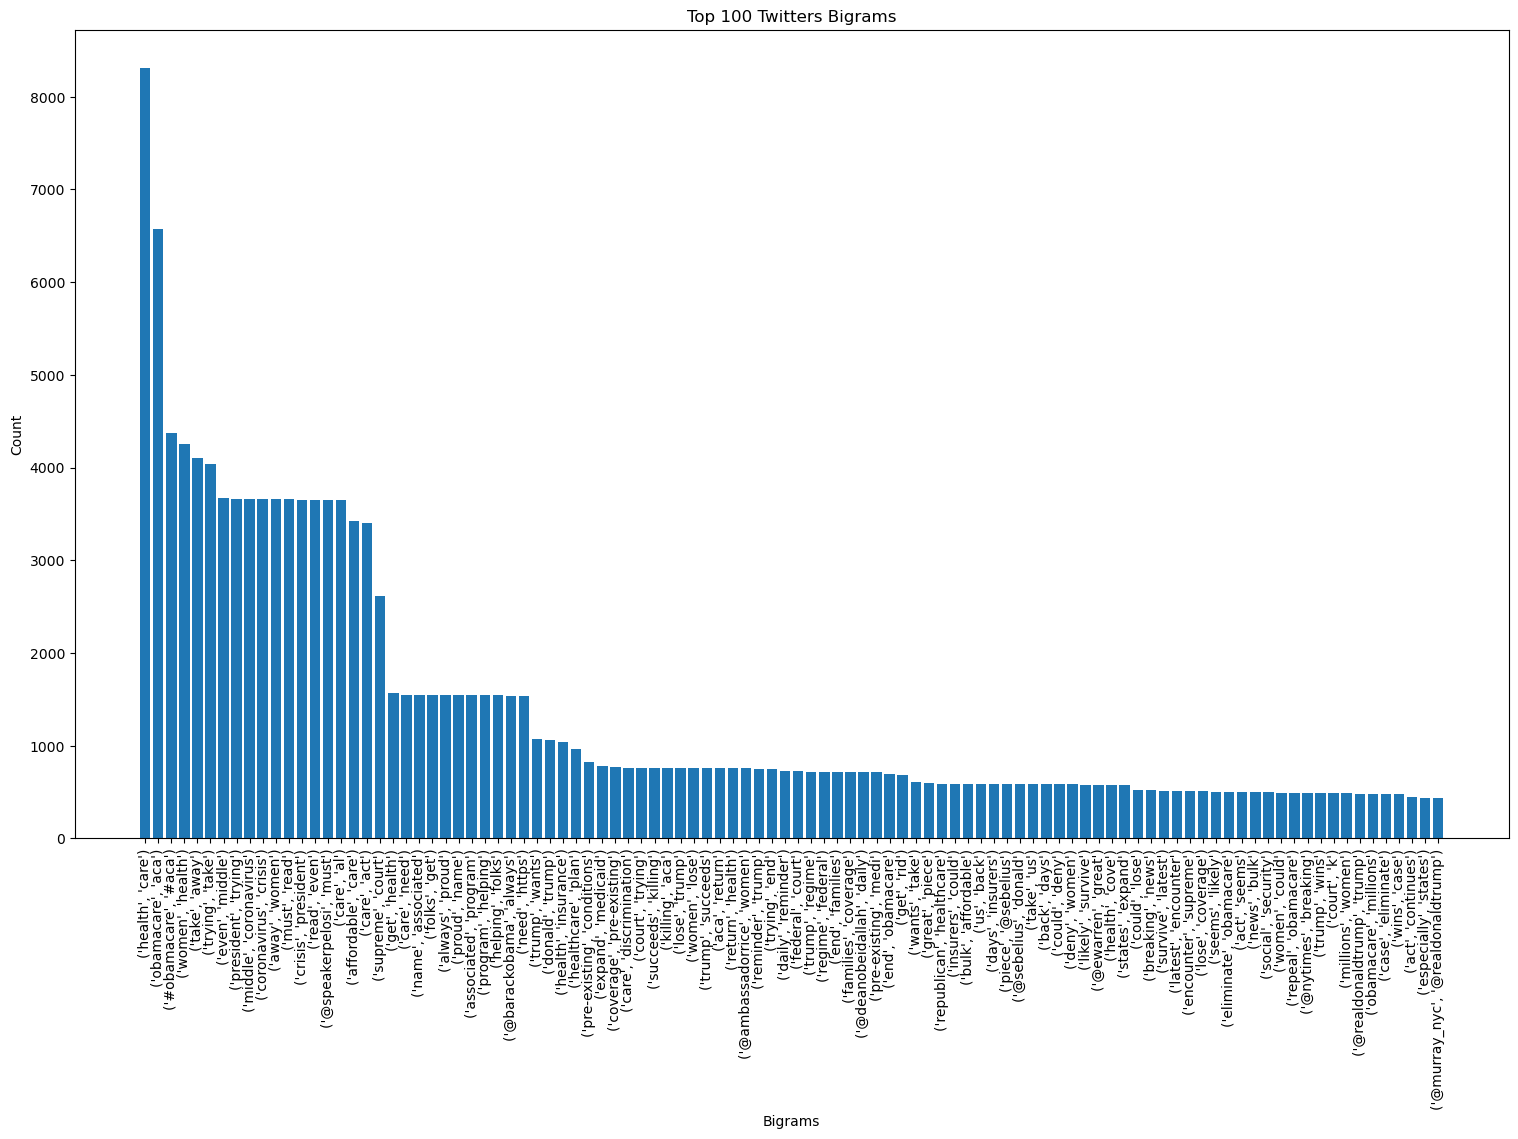

In [ ]:
sorted_dict = sorted(bi_count_dict.items(), key=lambda x: x[1], reverse=True)
top_100 = sorted_dict[:100]
top_100_words = [str(item[0]) for item in top_100]
top_100_count = [item[1] for item in top_100]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.bar(top_100_words, top_100_count)
plt.xticks(rotation = 90)
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.title('Top 100 Twitters Bigrams')
plt.show()

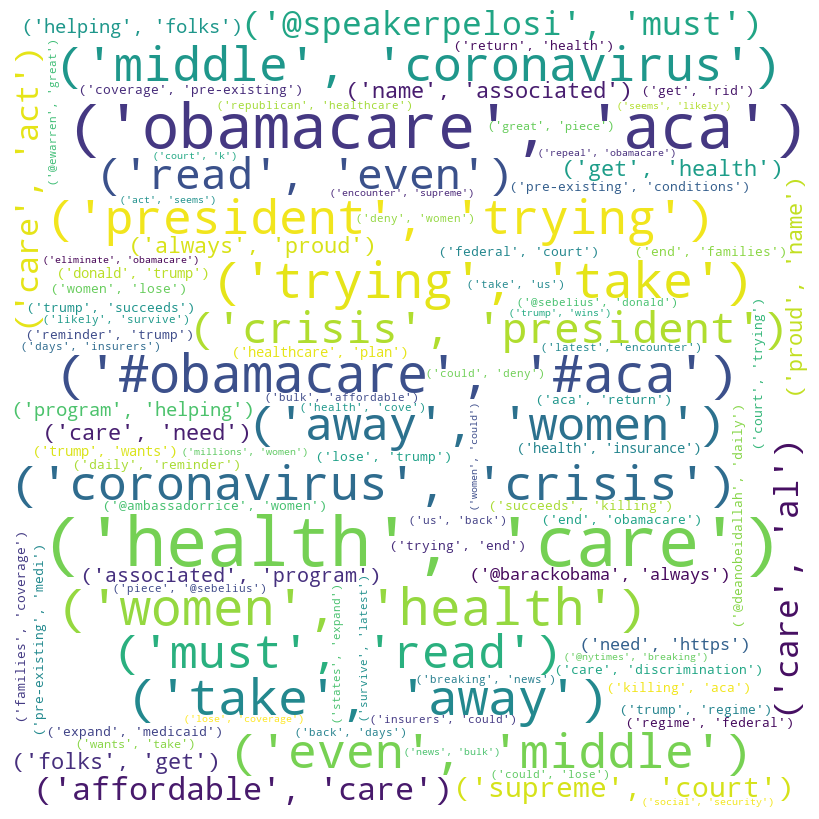

In [28]:
new_bi_dict = {}
for key, value in  bi_count_dict.items():
    new_key = str(key)
    new_bi_dict[new_key] = value

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies = new_bi_dict )

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()